In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#importer les données 
dataset = pd.read_csv('ds_prt.csv', delimiter =";")
dataset.head()

,Partner,Dependents,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.280157,-1.161611,-0.994123,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.440296,0.064298,-0.260859,-0.173727,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.440296,-1.239416,-0.363897,-0.959581,1.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,-0.440296,0.512450,-0.747797,-0.195234,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.239416,0.196164,-0.940391,1.0


<AxesSubplot:>

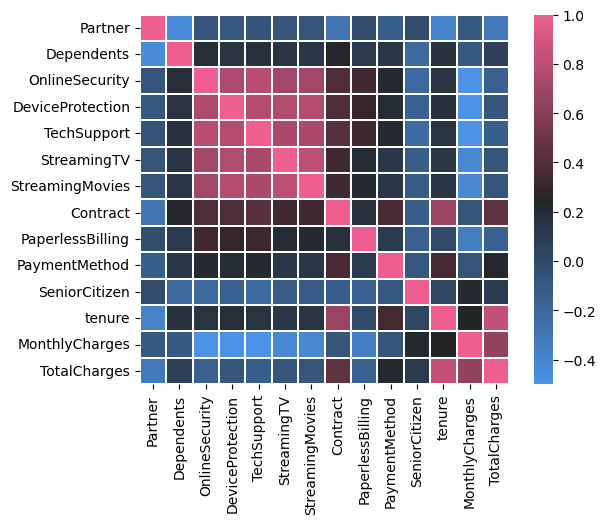

In [3]:
#correlation entre les données 
corr = dataset.iloc[:,: -1].corr(method="pearson")
cmap = sn.diverging_palette(250,354,80,60, center ='dark', as_cmap = True)
sn.heatmap(corr, vmax=1, vmin=-0.5, cmap = cmap, square =True, linewidths =0.2)
#on remarque que les variables sont independantes des autres donc on applique la classification bayesienne naive 

In [4]:
x = dataset.iloc[0:, :13]
x.head()

,Partner,Dependents,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.280157,-1.161611
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.440296,0.064298,-0.260859
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.440296,-1.239416,-0.363897
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,-0.440296,0.512450,-0.747797
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.239416,0.196164


In [5]:
y = dataset.iloc[0:,14]
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [6]:
#donnée a tableaux np 
X = np.array(x)
#print(X)
y = np.array(y)
#print(y)

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=24)
#print (xtrain)
#print (ytrain)

In [8]:
#probabilite cond (gauss)
def pro_cond(xtrain, moyenne, ecart_type):
    exponent = np.exp(-((xtrain - moyenne) ** 2) / (2 * (ecart_type ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * ecart_type)) * exponent 

In [9]:
#classif bayes 
def modele(xtrain, ytrain):
    nb_classes = 2 
    caract = xtrain.shape[1]
    moyennes = np.zeros((nb_classes, caract))
    ecart_types = np.zeros((nb_classes, caract))
    prioris = np.zeros(nb_classes)
    
#moy et ecart type de chaque classe
    for classe in range(nb_classes):
        xclasse = xtrain[ytrain == classe]
        moyennes[classe] = xclasse.mean(axis=0)
        ecart_types[classe] = xclasse.std(axis=0)

#nouvelle prob
    for classe in range(nb_classes):
        prioris[classe] = np.sum(ytrain == classe) / len(ytrain)

    return moyennes, ecart_types, prioris

In [10]:
def predire(xtest, moyennes, ecart_types, prioris):
    nb_classes = len(prioris)
    nb_test = xtest.shape[0]
    predictions = np.zeros(nb_test, dtype=int)

    for i in range(nb_test):
        probabilites_classes = np.zeros(nb_classes)

        for classe in range(nb_classes):
            probabilites_caract = pro_cond(xtest[i], moyennes[classe], ecart_types[classe])
            probabilites_caract = np.array(probabilites_caract, dtype=float)
            probabilites_classes[classe] = np.prod(probabilites_caract) * prioris[classe]

        predictions[i] = np.argmax(probabilites_classes)

    return predictions


In [11]:
#entraintement 
moyennes, ecart_types, prioris = modele (xtrain, ytrain)

#affichage 
print( moyennes)
print(ecart_types)
print (prioris)

[[ 0.46734398  0.34857281  0.87493953  0.91219158  0.87832608  0.91509434
   0.92718916  0.89090469  0.46371553  1.492985   -0.08746287  0.22043277
  -0.10636823]
 [ 0.6425218   0.1824279   0.26827632  0.40643863  0.27364185  0.55533199
   0.55331992  0.14419852  0.24681422  0.82562039  0.24522557 -0.56821306
   0.32516743]]
[[0.49893244 0.47651842 0.81030251 0.79200247 0.8087269  0.79048498
  0.78401482 0.85806992 0.4986817  1.12103697 0.91219521 0.98280959
  1.0408816 ]
 [0.47925728 0.38619679 0.55585987 0.59491371 0.55806634 0.5996786
  0.59986085 0.41436101 0.4311577  1.08729055 1.17840047 0.80345682
  0.81578742]]
[0.73493333 0.26506667]


In [12]:
pred = predire (xtest, moyennes, ecart_types, prioris)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, pred)
print("Précision :", accuracy)


Précision : 0.7107320540156361


In [15]:
#Verification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(y_pred)

#precision 
print("Précision:", accuracy_score(ytest, y_pred))


[1. 0. 1. ... 1. 1. 0.]
Précision: 0.7107320540156361
